## O2O优惠券线下使用数据分析


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

matplotlib.rc('font', family='KaiTi')
# 读取数据时就将日期转为datetime类型
df = pd.read_csv('../dataSets/5.O2O_Coupon_usage/ccf_offline_stage1_train.csv', parse_dates=['Date', 'Date_received'])
# 若输出为true则Coupon_id，Discount_rate，Date_received存在一一对应关系
print(np.all([df['Coupon_id'].isnull() == df['Discount_rate'].isnull(), df['Date_received'].isnull() == df['Coupon_id'].isnull(), df['Discount_rate'].isnull() == df['Date_received'].isnull()]))

df['Discount_rate'] = df['Discount_rate'].fillna('null')
df

True


,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,null,0.0,NaT,2016-02-17
1,1439408,4663,11002.0,150:20,1.0,2016-05-28,NaT
2,1439408,2632,8591.0,20:1,0.0,2016-02-17,NaT
3,1439408,2632,1078.0,20:1,0.0,2016-03-19,NaT
4,1439408,2632,8591.0,20:1,0.0,2016-06-13,NaT
...,...,...,...,...,...,...,...
1754879,212662,3532,NaN,null,1.0,NaT,2016-03-22
1754880,212662,3021,3739.0,30:1,6.0,2016-05-08,2016-06-02
1754881,212662,2934,NaN,null,2.0,NaT,2016-03-21
1754882,752472,7113,1633.0,50:10,6.0,2016-06-13,NaT


In [2]:
def discount_transform(data):
    if ':' in data: # 满减
        data = data.split(':')
        data = (int(data[0]) - int(data[1])) / int(data[0])
        return data
    elif data == 'null':
        return np.nan
    else:
        return float(data[0])


df['Discount_rate'] = df['Discount_rate'].map(discount_transform).round(2)
df

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,NaN,0.0,NaT,2016-02-17
1,1439408,4663,11002.0,0.87,1.0,2016-05-28,NaT
2,1439408,2632,8591.0,0.95,0.0,2016-02-17,NaT
3,1439408,2632,1078.0,0.95,0.0,2016-03-19,NaT
4,1439408,2632,8591.0,0.95,0.0,2016-06-13,NaT
...,...,...,...,...,...,...,...
1754879,212662,3532,NaN,NaN,1.0,NaT,2016-03-22
1754880,212662,3021,3739.0,0.97,6.0,2016-05-08,2016-06-02
1754881,212662,2934,NaN,NaN,2.0,NaT,2016-03-21
1754882,752472,7113,1633.0,0.80,6.0,2016-06-13,NaT


## 对消费人群类别进行分析


In [3]:
# 如果Date == null & Coupon_id != null 表示 有优惠券，但没有消费 cpon_no_consume
# 如果Date == null & Coupon_id == null 表示 没有优惠券，也没有消费 no_cpon_no_consume
# 如果Date != null & Coupon_id != null 表示 有优惠券，使用了优惠券消费 cpon_consume
# 如果Date != null & Coupon_id == null 表示 没有优惠券，但仍然消费了 no_cpon_consume
def user_kinds_func(data):
    if pd.notnull(data.iloc[0]) & pd.isnull(data.iloc[1]):
        return 'cpon_no_consume'
    elif pd.isnull(data.iloc[0]) & pd.isnull(data.iloc[1]):
        return 'no_cpon_no_consume'
    elif pd.notnull(data.iloc[0]) & pd.notnull(data.iloc[1]):
        return 'cpon_consume'
    else:
        return 'no_cpon_consume'


df['user_kinds'] = df.loc[:, ['Coupon_id', 'Date']].apply(user_kinds_func, axis=1)
df

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,user_kinds
0,1439408,2632,NaN,NaN,0.0,NaT,2016-02-17,no_cpon_consume
1,1439408,4663,11002.0,0.87,1.0,2016-05-28,NaT,cpon_no_consume
2,1439408,2632,8591.0,0.95,0.0,2016-02-17,NaT,cpon_no_consume
3,1439408,2632,1078.0,0.95,0.0,2016-03-19,NaT,cpon_no_consume
4,1439408,2632,8591.0,0.95,0.0,2016-06-13,NaT,cpon_no_consume
...,...,...,...,...,...,...,...,...
1754879,212662,3532,NaN,NaN,1.0,NaT,2016-03-22,no_cpon_consume
1754880,212662,3021,3739.0,0.97,6.0,2016-05-08,2016-06-02,cpon_consume
1754881,212662,2934,NaN,NaN,2.0,NaT,2016-03-21,no_cpon_consume
1754882,752472,7113,1633.0,0.80,6.0,2016-06-13,NaT,cpon_no_consume


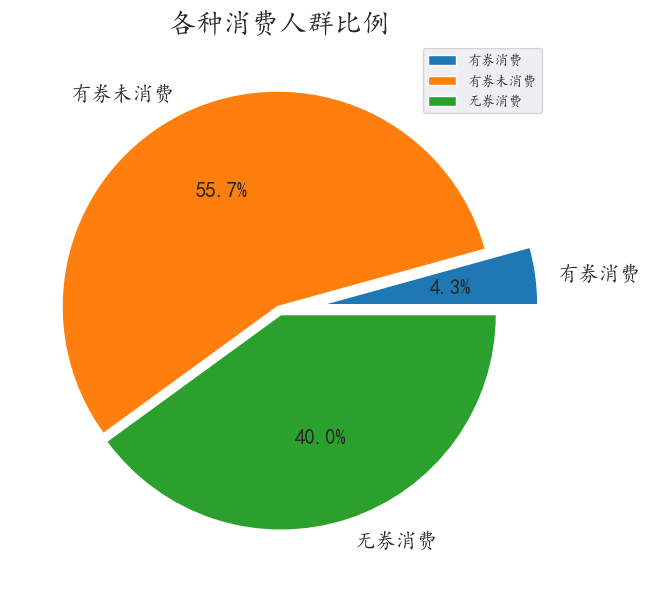

In [4]:
consume_grouped = df.groupby('user_kinds')
consume_grouped.size().plot.pie(autopct='%1.1f%%', fontsize=15, figsize=(15, 7), explode=[0.2, 0.02, 0.02], labels=['有券消费', '有券未消费', '无券消费'])
plt.title('各种消费人群比例', fontsize=20)
plt.legend()

### 在有券消费人群中，分析优惠折扣和距离

In [5]:
cpon_consume_data = df[df['user_kinds'] == 'cpon_consume']
Merchant_distance = cpon_consume_data.groupby('Merchant_id')['Distance'].mean().round(2)
Merchant_distance.describe()


count    3738.00000
mean        1.72279
std         2.50675
min         0.00000
25%         0.00000
50%         0.63500
75%         2.50000
max        10.00000
Name: Distance, dtype: float64

0.8046025515210992


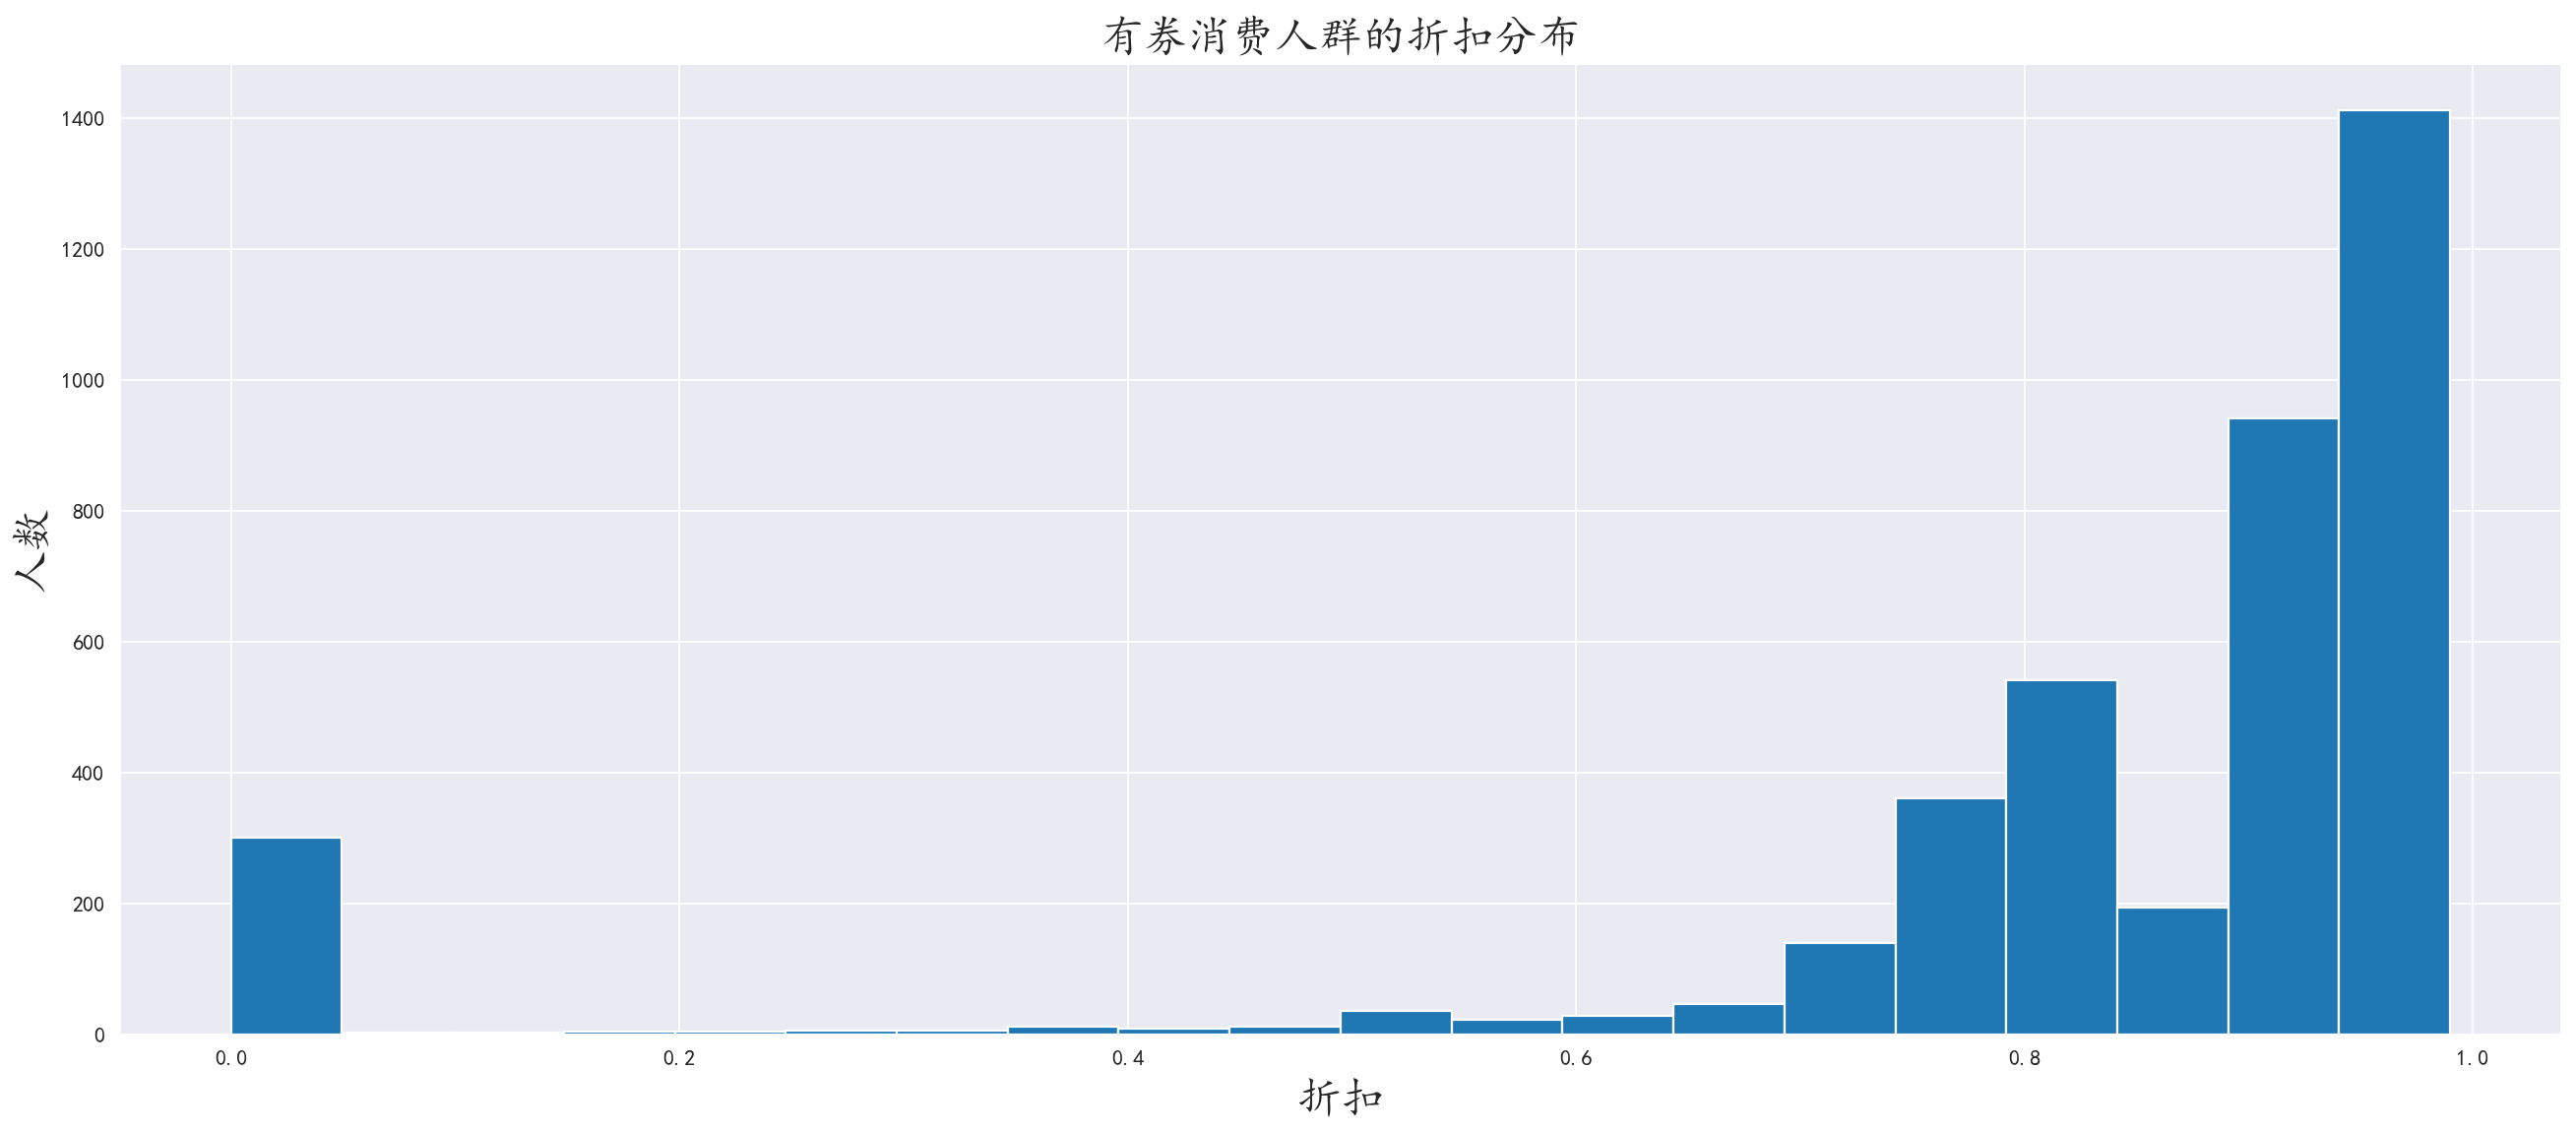

In [17]:
Merchant_discount = df[df['user_kinds'] == 'cpon_consume'].groupby('Merchant_id')['Discount_rate'].mean().round(2)
plt.figure(figsize=(20, 8), dpi=160)
plt.title('有券消费人群的折扣分布', fontsize=20)
Merchant_discount.plot(kind='hist', bins=20)
plt.xlabel('折扣', fontsize=20)
plt.ylabel('人数', fontsize=20)
print(Merchant_discount.mean())

### 持券消费用户数量最多的商家


In [7]:
Merchant_cpon_consume_num = df[df['user_kinds'] == 'cpon_consume'].groupby('Merchant_id')['User_id'].apply(lambda x: len(x.unique())).sort_values(ascending=False)
MCCN_500 = Merchant_cpon_consume_num[Merchant_cpon_consume_num > 500]
MCCN_500.name = 'cpon_consume_num'
MCCN_500

Merchant_id
5341    2800
760     2627
3381    2248
6485    2029
2099    1401
2934    1310
450     1094
3532     968
7555     925
1520     870
6901     855
3621     851
4142     832
1379     587
1469     584
1433     559
Name: cpon_consume_num, dtype: int64

### 持券消费人数最多的商家，距离和折扣力度的关系


In [8]:
temp_MCCN = pd.merge(left=MCCN_500, right=Merchant_distance, how='left', on='Merchant_id')
MCCN_distance_discount_data = pd.merge(left=temp_MCCN, right=Merchant_discount, how='left', on='Merchant_id')
MCCN_distance_discount_data

,cpon_consume_num,Distance,Discount_rate
Merchant_id,,,
5341,2800,0.17,0.83
760,2627,0.35,0.79
3381,2248,1.65,0.74
6485,2029,0.37,0.76
2099,1401,0.97,0.90
2934,1310,1.11,0.83
450,1094,0.89,0.82
3532,968,0.27,0.85
7555,925,1.33,0.79


### 计算到店持券消费人数与距离和折扣的相关系数

In [9]:
#corr(correlation:相关系数),用来计算df数据中列与列的相关性(皮尔逊相关系数)
#正相关:随着变量的增大,而增大,反之同理
#负相关:随着变量的增大,而减小,反之同理

MCCN_distance_discount_data.corr()

,cpon_consume_num,Distance,Discount_rate
cpon_consume_num,1.000000,-0.306175,0.205667
Distance,-0.306175,1.000000,-0.529191
Discount_rate,0.205667,-0.529191,1.000000


<Axes: >

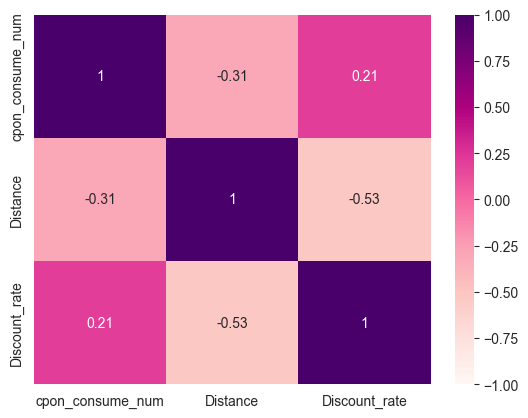

In [10]:
# 生成热力图
plt.rcParams['font.family'] = 'Arial'
sns.heatmap(MCCN_distance_discount_data.corr(), cmap='RdPu', annot=True, vmin=-1, vmax=1)

### 每天发放的优惠券与使用优惠券的分析


In [11]:
print(f'总体优惠券使用率为：{round(df['Date'].notnull().sum() / df['Date_received'].notnull().sum(), 2)}')
df

总体优惠券使用率为：0.74


,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,user_kinds
0,1439408,2632,NaN,NaN,0.0,NaT,2016-02-17,no_cpon_consume
1,1439408,4663,11002.0,0.87,1.0,2016-05-28,NaT,cpon_no_consume
2,1439408,2632,8591.0,0.95,0.0,2016-02-17,NaT,cpon_no_consume
3,1439408,2632,1078.0,0.95,0.0,2016-03-19,NaT,cpon_no_consume
4,1439408,2632,8591.0,0.95,0.0,2016-06-13,NaT,cpon_no_consume
...,...,...,...,...,...,...,...,...
1754879,212662,3532,NaN,NaN,1.0,NaT,2016-03-22,no_cpon_consume
1754880,212662,3021,3739.0,0.97,6.0,2016-05-08,2016-06-02,cpon_consume
1754881,212662,2934,NaN,NaN,2.0,NaT,2016-03-21,no_cpon_consume
1754882,752472,7113,1633.0,0.80,6.0,2016-06-13,NaT,cpon_no_consume


In [12]:
# 统计每天使用优惠券的人数
everyday_consume = cpon_consume_data.groupby('Date_received')['User_id'].count()
everyday_consume.name = 'Count'
everyday_consume

Date_received
2016-01-01     74
2016-01-02     67
2016-01-03     74
2016-01-04     98
2016-01-05    107
             ... 
2016-06-11    351
2016-06-12    330
2016-06-13    439
2016-06-14    394
2016-06-15    355
Name: Count, Length: 167, dtype: int64

In [13]:
# 统计每天发放优惠券的数量
send_cpon_num = df[df['Date_received'].notnull()].groupby('Date_received').size()
send_cpon_num.name = 'Count'
send_cpon_num

Date_received
2016-01-01     554
2016-01-02     542
2016-01-03     536
2016-01-04     577
2016-01-05     691
              ... 
2016-06-11    5211
2016-06-12    4005
2016-06-13    7861
2016-06-14    4755
2016-06-15    3475
Name: Count, Length: 167, dtype: int64

In [14]:
send_used_data = pd.merge(send_cpon_num, everyday_consume, on='Date_received', how='left', suffixes=('_send', '_used'))
send_used_data['used_percent'] = (send_used_data['Count_used'] / send_used_data['Count_send']).round(2)
send_used_data

,Count_send,Count_used,used_percent
Date_received,,,
2016-01-01,554,74,0.13
2016-01-02,542,67,0.12
2016-01-03,536,74,0.14
2016-01-04,577,98,0.17
2016-01-05,691,107,0.15
...,...,...,...
2016-06-11,5211,351,0.07
2016-06-12,4005,330,0.08
2016-06-13,7861,439,0.06


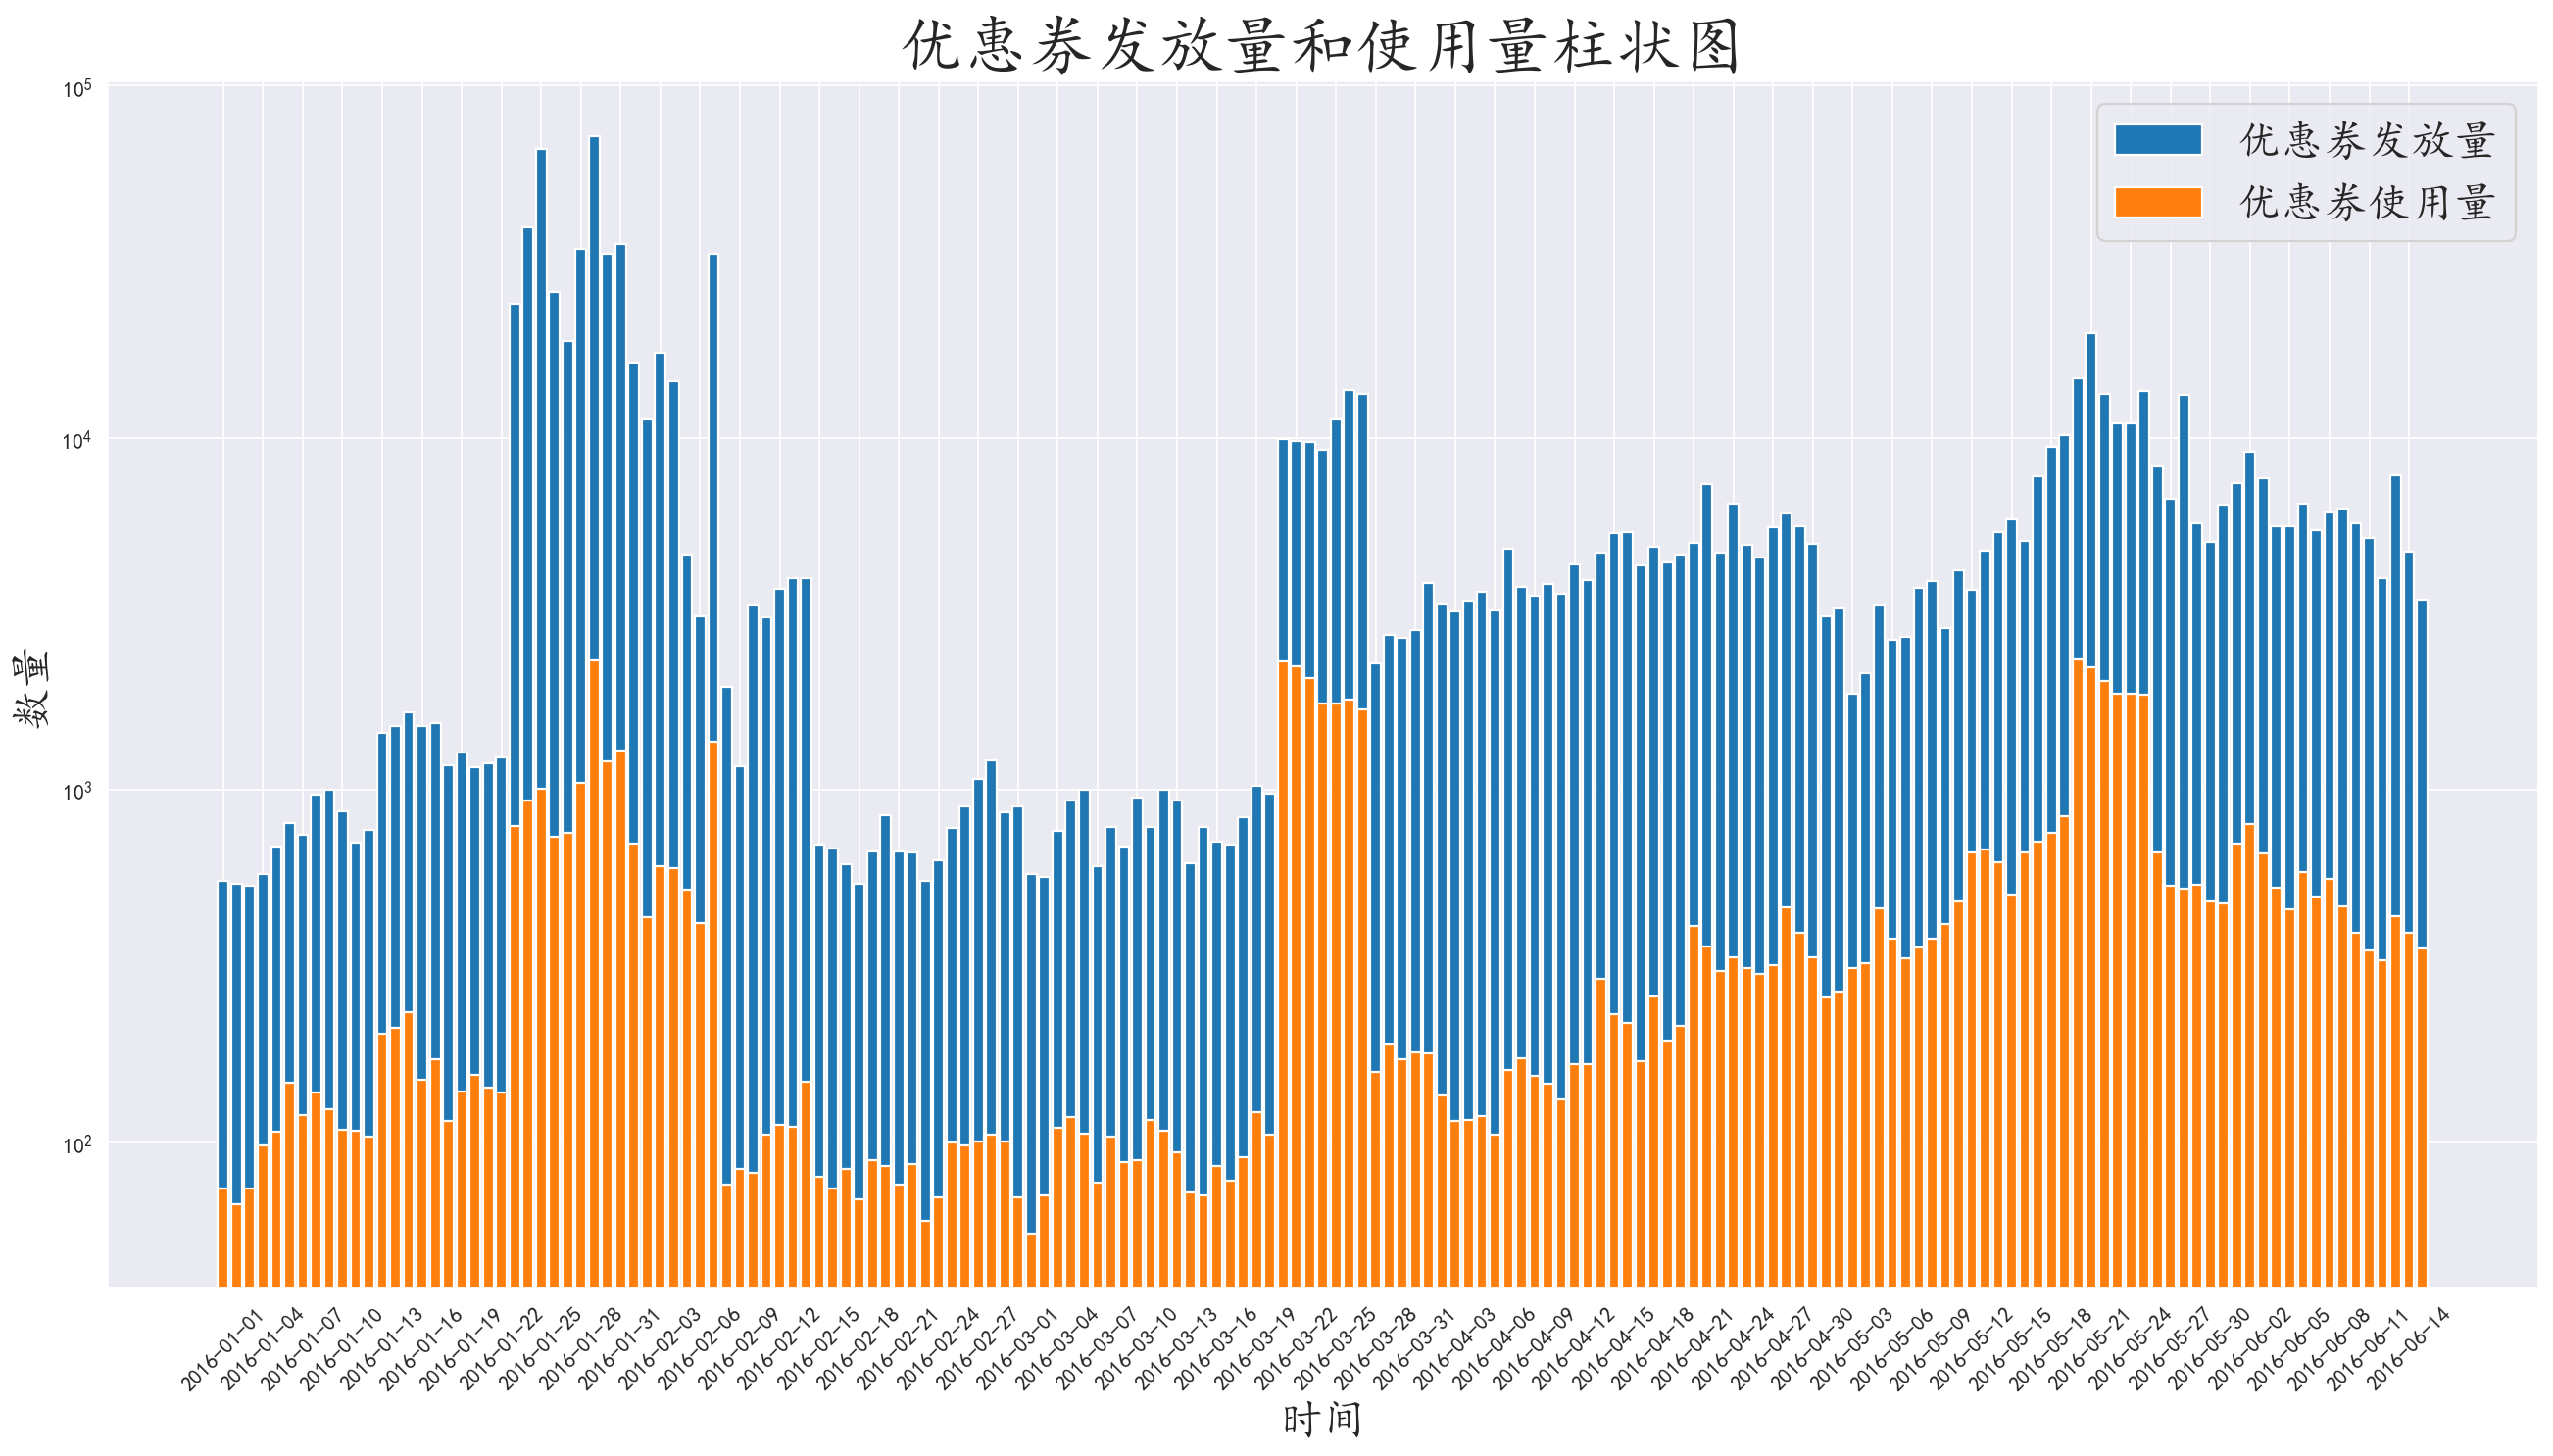

In [15]:
# 绘制图表
plt.rcParams['font.family'] = 'KaiTi'
plt.figure(figsize=(20, 10), dpi=160)
x_send = range(send_used_data.shape[0])

y_send = send_used_data['Count_send']
y_used = send_used_data['Count_used']

plt.bar(x_send, y_send, label='优惠券发放量')
plt.bar(x_send, y_used, label='优惠券使用量')
plt.xticks(x_send[::3], send_used_data.index.strftime('%Y-%m-%d')[::3], rotation=45)
plt.legend(fontsize=20)
plt.title('优惠券发放量和使用量柱状图', fontsize=30)
plt.xlabel('时间', fontsize=20)
plt.ylabel('数量', fontsize=20)
plt.yscale('log')
plt.show()

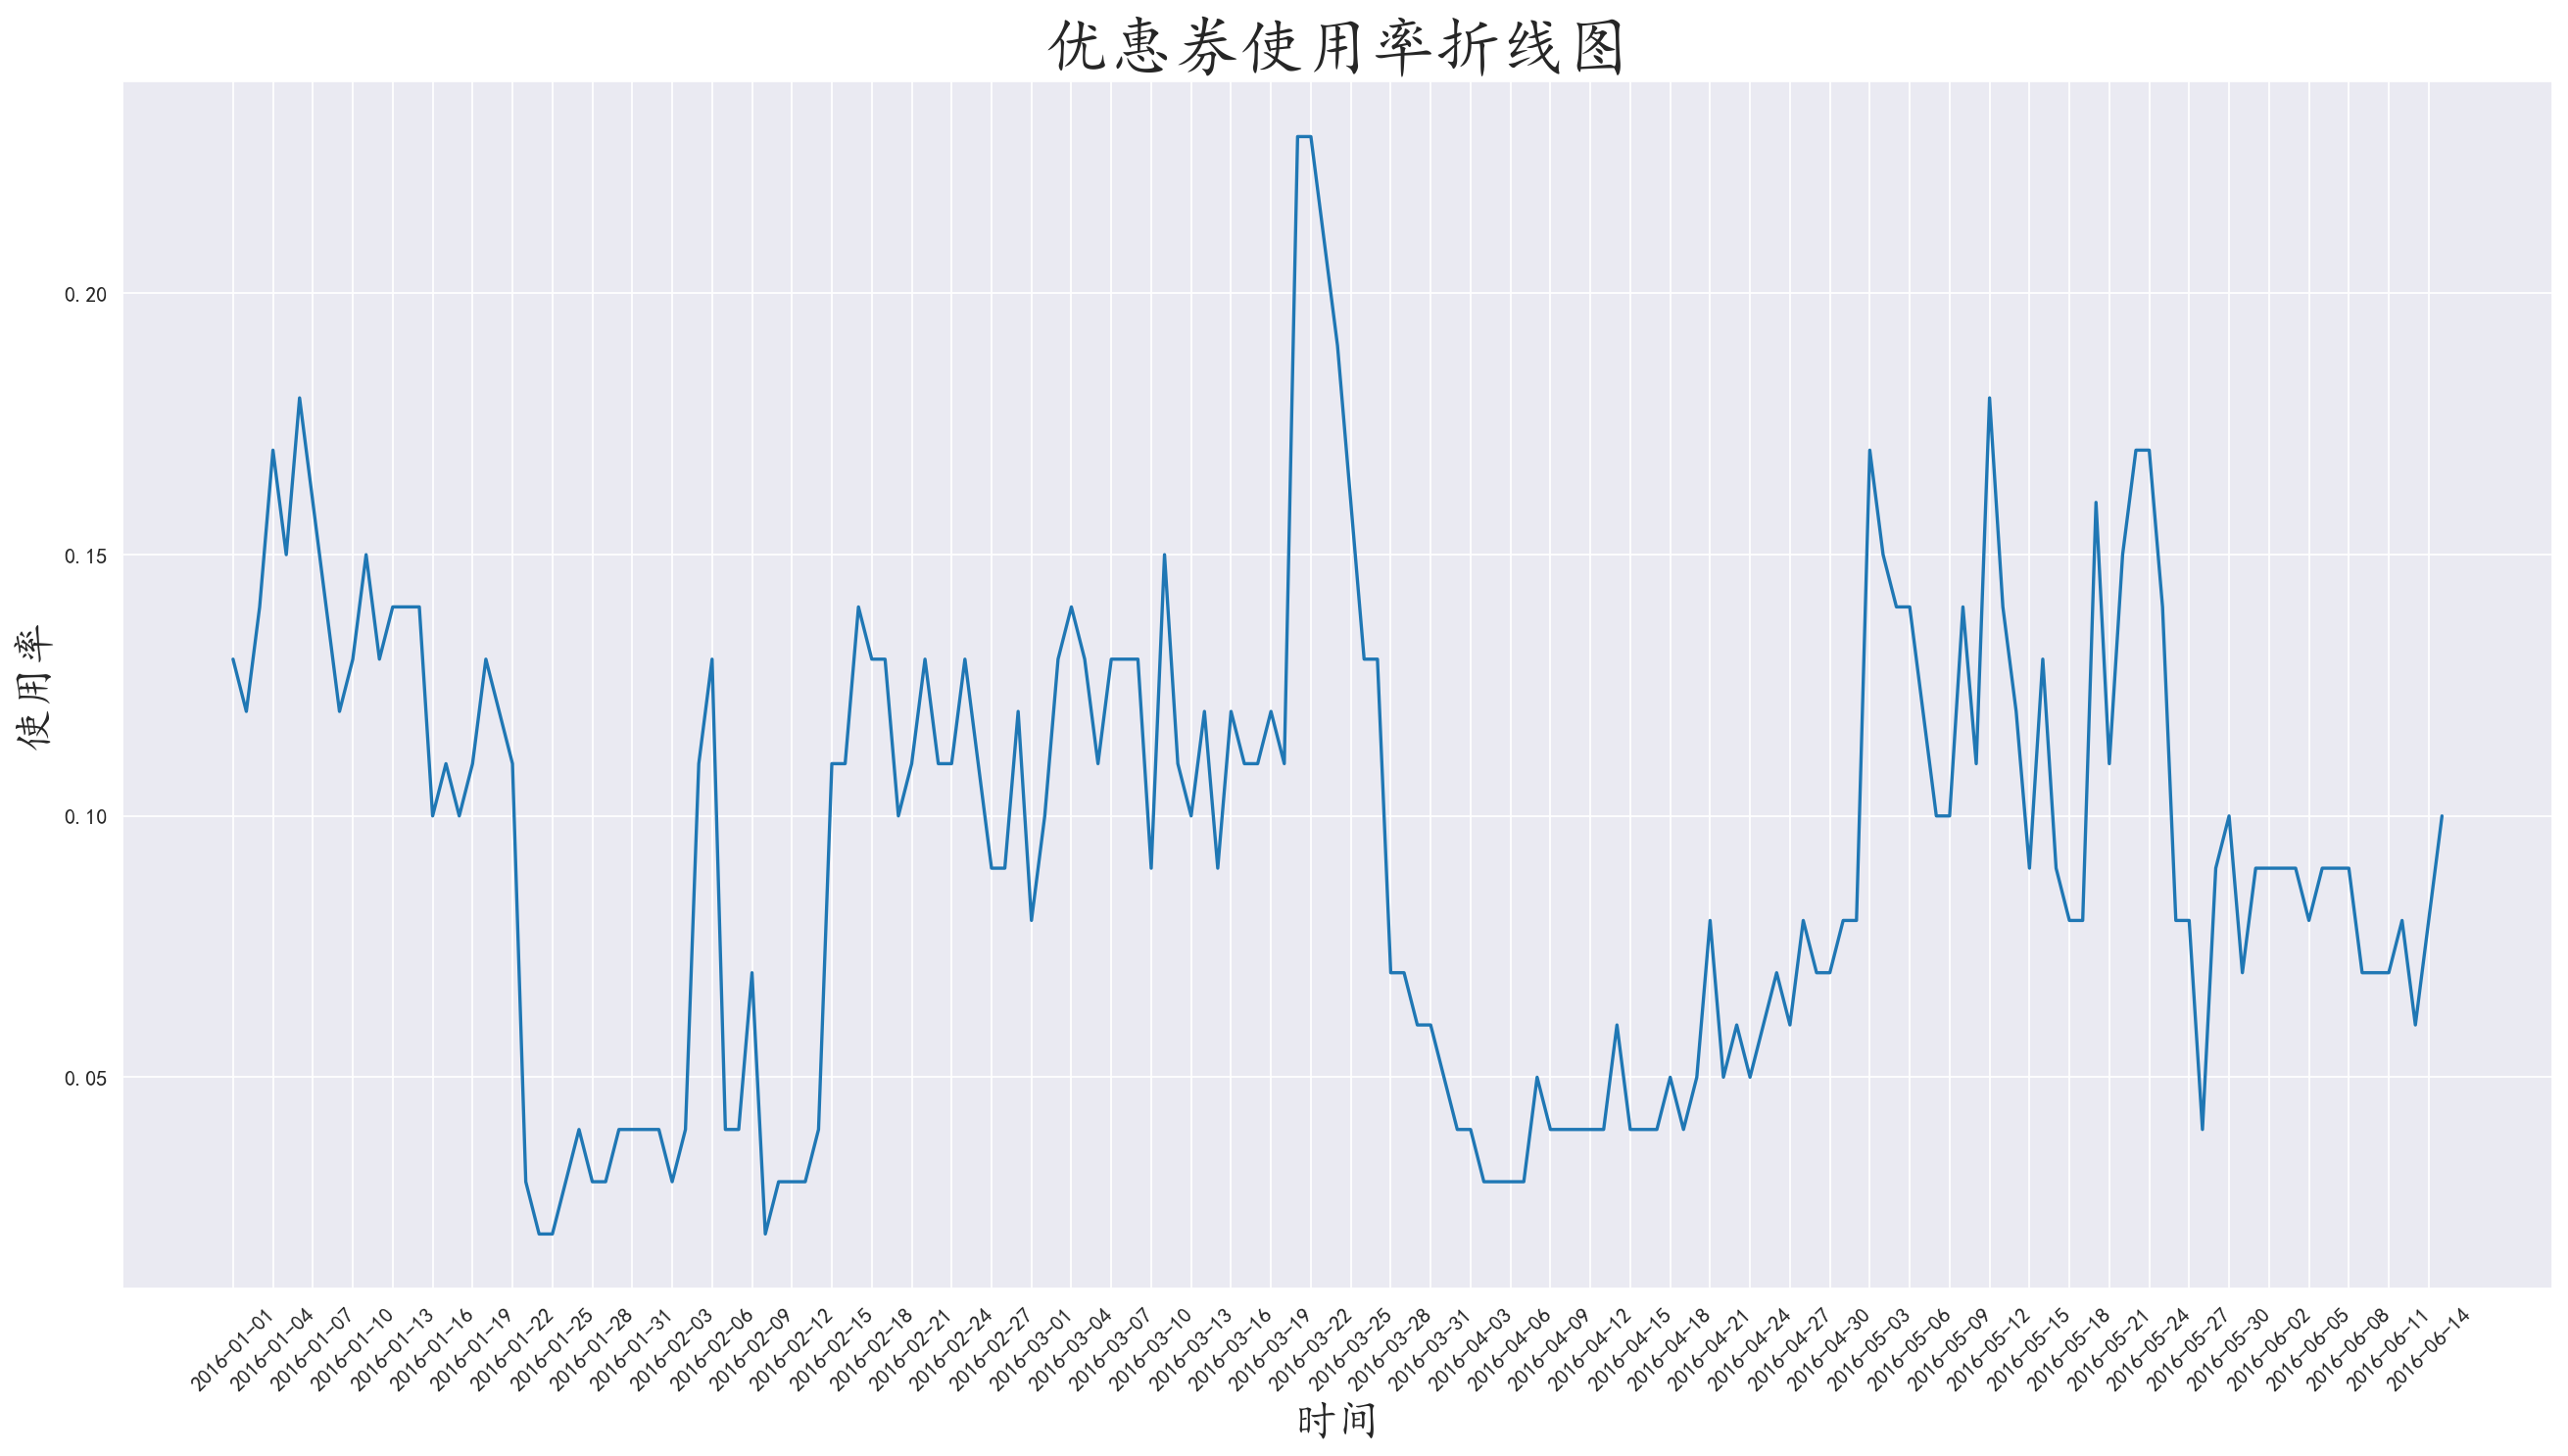

In [16]:
plt.figure(figsize=(20, 10), dpi=160)
plt.xticks(x_send[::3], send_used_data.index.strftime('%Y-%m-%d')[::3], rotation=45)
plt.plot(x_send, send_used_data['used_percent'])

plt.title('优惠券使用率折线图', fontsize=30)
plt.xlabel('时间', fontsize=20)
plt.ylabel('使用率', fontsize=20)

plt.show()